In [324]:
import torch
import numpy as np
import re
from collections import Counter
import nltk
import matplotlib.pyplot as plt

In [15]:
def read(path):
    file = open(path, encoding='utf8')
    lines = [line for line in file.readlines()]
    file.close()
    return lines

In [6]:
train_negative = 'train_negative_tokenized.txt'
train_neural = 'train_neutral_tokenized.txt'
train_positive = 'train_neutral_tokenized.txt'

In [305]:
negative = read(train_negative)
neural = read(train_neural)
positive = read(train_negative)

In [310]:
train_set = negative + neural + positive
train_set = negative

# bỏ những dòng trống
train_set = [i for i in train_set if i != '\n']
size = len(train_set)

# 
for i in range(size):
    train_set[i] = train_set[i].lower()

# bỏ các ký tự unicode
for i in range(size):
    train_set[i] = train_set[i].replace('\ufeff', '').replace('\xa0', '').replace('\u200e', '').replace('\u200b', '')

# bỏ các chuỗi mặt cười
for i in range(size):
    train_set[i] = re.sub(r':(\s*\))+\s', '', train_set[i])

# bỏ các chuỗi '...'
for i in range(size):
    train_set[i] = re.sub(r':(\s*\))+\s', '', train_set[i])


In [311]:
train_set[:5]

['mình đã dùng anywhere thế_hệ đầu , quả_là đầy thất_vọng , hiện_tại đang vứt xó . giá thì đắt , ngốn pin như ăn_gỏi , nặng \n',
 'quan_tâm nhất_là độ trễ có cao không , dùng thi_thoảng nó cứ trễ bực_mình , đấy mới chỉ là dùng văn_phòng chứ game thì chắc là ném đi từ lâu . không biết con này có độ trễ không nhỉ . dùng nhiều loại nhưng vẫn kết nhất con chuột sứ mitsumi , gọn bấm nảy tốt \n',
 'dag xài con cùi bắp 98k ... . pin trâu , mỗi_tội đánh liên_minh ức_chế đập hết 2 con \n',
 'logitech chắc hàng phải tiền triệu trở_lên dùng mới thích chứ em dùng con có 400k thấy được vài bữa là hư . chuyển sang eblue dùng được hơn năm chưa thấy hỏng . \n',
 'đang xài con m_175 cùi mía , nhà xài nhiều chuột nên thử con này con kia chơi và kết_quả là sau 3 tháng và 4 con chuột khác_nhau đủ kiểu đa chức_năng mà h chỉ còn lại là con m_175 cùi mía còn xài dc : 3 h đi mua chuột là xác_định ko để mấy con nhân_viên vấy ngắn nó dụ nửa cứ logitech mà fan \n']

In [312]:
train_set_cleaned = train_set
vocab = Counter()

for i, sentence in enumerate(train_set):
    train_set[i] = []
    for word in nltk.word_tokenize(sentence):  # Tokenizing the words
        vocab.update([word])
        train_set[i].append(word)
vocab_ = vocab

In [313]:
vocab = sorted(vocab, key=vocab.get, reverse=True)

In [314]:
w2i = {w:i for i,w in enumerate(vocab)}
i2w = {i:w for i,w in enumerate(vocab)}

In [315]:
vocab_sorted = vocab
for i, sentence in enumerate(train_set):
    train_set[i] = [w2i[word] if word in w2i else 0 for word in sentence]

In [331]:
count = np.zeros(len(train_set))
for s in train_set:
    count[len(s)] += 1

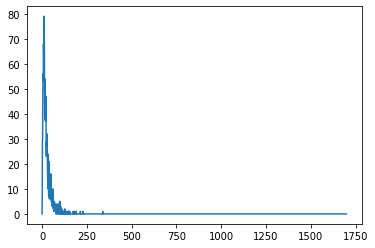

In [332]:
plt.plot(count)
plt.show()